In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import random
import time
import os
from IPython.display import display
import matplotlib.pyplot as plt

# Comparative Study of Dynamic Programming and Genetic Algorithms for the Solution of 0/1 Knapsack Problem

### Author Ivan Georgiev

## Abstract 

The 0/1 Knapsack Problem involves selecting a subset of items, each with a given weight and value, to maximize total value without exceeding a capacity limit. In this project, we compare two solution strategies: **Dynamic Programming (DP)**, which guarantees an optimal solution, and **Genetic Algorithms (GA)**, a heuristic approach inspired by natural evolution. Our objective is to analyze and compare each algorithm’s runtime and solution quality across a range of problem sizes. Experiments results demonstrate that **DP** outperforms **GA** on smaller instances by producing exact solutions efficiently, whereas **GA** scales more effectively to larger instances but cannot guarantee optimality. These findings ouline the trade-off between exact and approximate techniques and suggesting that a fast, heuristic **GA** is advantageous for large-scale problems, while the exactness of **DP** is preferable when problem sizes remain modest. 

## 1.Introduction 

The 0/1 Knapsack Problem is a classic challenge in combinatorial optimization. Given $n$ items, each with weight $w_i$ and value $v_i$, the goal is to select a subset that fits within a total weight capacity $W$, while maximizing total value. The “0/1” constraint means each item is either included or excluded and no partial selections are allowed. This problem has both theoretical significance and practical impact. Applications range from budget allocation under financial constraints to load planning in logistics and resource distribution in project management. Because of its wide-ranging relevance, finding efficient solution methods has been the subject of extensive research.
**Dynamic Programming (DP)** provides an exact solution, leveraging the problem’s optimal substructure to find the best subset in $\mathrm{O}(n\times W)$ time, where $n$ is the number of items and $W$ is the capacity. However, this pseudo-polynomial complexity can become impractical for large $n$ or $W$, leading to computational inefficiencies when either parameter grows very large.
In contrast, **Genetic Algorithms (GAs)** are inspired by natural evolution and offer a heuristic alternative. By evolving populations of solutions through selection, crossover, and mutation, **GAs** often deliver near-optimal results more quickly, though they do not guarantee optimality and typically require careful tuning of parameters.
### 1.1 0/1 Knapsack Problem Definition 
Given $n$ items, each with positive integer weight $w_i\in \mathbb{Z}^+$ and value $v_i\in \mathbb{Z}^+$, and a knapsack of capacity $W\in \mathbb{Z}^+$, the goal is to choose a subset of items that maximizes total value while ensuring the total weight does not exceed $W$. Each item is either included or excluded and no fractional selections are allowed.[1]

<img src="pictures/Knapsack_Visualization.png" alt="Knapsack_Visualization" width="300px" /> 

Binary decision variables definition: 
$$ x_i = \begin{cases} 1, & \text{if we include item }i,\\ 0, &\text{otherwise}\end{cases} $$

The optimization problem is: 

\begin{align*}
\max\;           & \sum_{i=1}^n v_i\,x_i            && (\text{maximize total value})\\
\text{subject to}\; & \sum_{i=1}^n w_i\,x_i \le W    && (\text{capacity constraint})\\
                  & x_i \in \{0,1\}, \; i=1,\dots,n.
\end{align*}

The capacity constraint $$\sum_{i=1}^{n} w_i x_i \leq W$$ ensures the total weight does not exceed the knapsack’s capacity, and the binary variables $x_i$ enforce the all-or-nothing selection rule.

**Example**: Let's consider 3 items with weights $w_1 = 2$, $w_2 = 3$, $w_3 = 4$, values $v_1 = 3$, $v_2 = 4$, $v_3 = 5$, and capacity $W = 5$. 

- One valid (but suboptimal) choice is to take only item 2: $(x_1,x_2,x_3)=(0,1,0)$, giving weight $3\le5$ and value $4$.
- Another valid choice is to take items 1 and 2: $(x_1,x_2,x_3)=(1,1,0)$, giving weight $2+3=5\le5$ and value $3+4=7$.
- Taking only item 3, $(0,0,1)$, yields weight $4\le5$ and value $5$.

Among these, the best (optimal) is to take items 1 and 2, for a total weight of $5$ and total value of $7,$, which maximizes value without exceeding the capacity.

0/1 Knapsacc Problem exact solutions, like Dynamic Programming, require pseudo-polynomial time, while heuristic approaches, like Genetic Algorithms, offer faster but approximate solutions and could be used for large instances, where the exact solutions inefficient.
### 1.2 Previous Work Preview 
Over the last two decades, numerous studies have been completed comparing different approaches to solve the 0/1 Knapsack Problem [2]. These studies reveal that the two most effective methods are **GA** and **DP** [3]. Research on both approaches shows a consistent pattern in which **GA** has proven to be a powerful heuristic algorithm that scales to large instances and produces near-optimal solutions quickly, while **DP** remains an invaluable exact solver for smaller instances or for verification. The choice between them depends on problem size, available time and resources, and how critical finding the absolute optimum is essentially a trade-off between optimality and efficiency.[3][4]
#### 1.2.1 Runtime Performance 
One fundamental difference between **DP** and **GA** is their computational complexity. A typical **DP** algorithm for the 0/1 Knapsack problem runs in pseudo-polynomial time $\mathrm{O}(n \times W)$, where $n$ is the number of items and $W$ is the capacity. In the worst case when $W$ is large relative to the item weights this pseudo-polynomial time becomes exponential in the length of the input. By contrast, a **GA** does not estimate all weight state combinations and its runtime per generation is roughly $\mathrm{O}(n \times G)$, which is linear in problem size for each generation. If the population size $P$ and the number of generations $G$ are bounded by a polynomial in $n$, then GAs often run in near-linear time overall. Exact **DP** algorithms tend to slow down substantially as the problem size and capacity grow, whereas GAs scale more gracefully. In summary, **GAs** generally offer dramatically lower runtime for large-scale Knapsack Kroblems, while **DP** guarantees optimality at the cost of higher computation time.[3][5]
#### 1.2.2 Solution Accuracy
The trade-off for **GAs’** speed is related to the fact that **GA** provide approximate solutions. Dynamic programming is an exact method, always yielding the global optimal knapsack value. By contrast, **GA** is a stochastic heuristic and does not guarantee the optimal solution. The quality of **GA** solutions depends on factors like population diversity, number of generations, and genetic operators. In practice, however, well-tuned **GAs** often achieve near-optimal results for knapsack instances. Many comparative studies measure how close a **GA’s** best solution is to the optimal obtained by **DP** or other exact methods. Over the past decade, results consistently show that GA can reach 90–100% of the optimal value on average, especially with sufficient iteration. 
In summary, **DP** guarantees 100% optimal knapsack value, while **GA** usually achieve near-optimal values (95–100% of optimum) with far less computation time. The last decade of experiments confirms that a properly configured **GA** can yield solutions of impressive quality for 0/1 Knapsack Problem, although small deviations from the optimal value can occur if the **GA** converges prematurely or has insufficient diversity.[3][4][5]

### 1.3 General Principles of Dynamic Programming Algorithm  
**Dynamic Programming (DP)** is a powerful algorithmic paradigm for solving complex problems by breaking them into simpler, overlapping subproblems.[6] It relies on two fundamental principles:
- Optimal Substructure: An optimal solution to the overall problem can be composed from optimal solutions to its subproblems.
- Overlapping Subproblems: The complex problem’s subproblems recur many times, so we can gain efficiency by solving each subproblem only once and storing its result in a table.

Dynamic programming can be implemented in two primary ways:
- Top‐down approach (memoization): A recursive formulation of the function (or value) is written, and each computed result is stored (in a cache or lookup table) to avoid redundant computations.
- Bottom‐up approach (tabulation): The subproblems are ordered by size or index and filled in a table iteratively so that larger problems build directly on already computed smaller ones.
#### 1.3.1 DP Knapsack Algorithm
In our study, we will focus on Dymanic Programming solution to 0/1 Knapsack Problem using a bottom-up approach. In that approach a 2D table, often denoted as $\text{DP}[i][w]$ of size $\text(n+1)×(W+1)$ is constructed. 
$$\begin{equation}\mathrm{DP}[i][w]= \max\bigl\{\text{total value using items in }\{1,\dots,i\}\text{ with capacity }w\bigr\},\quad0 \le i \le n,\;
0 \le w \le W.\end{equation}$$

The rows of the table represent the number of items considered (from 0 to $n$), and the columns represent the knapsack capacity (from 0 to $W$).  The table is filled iteratively, starting from the base cases where no items are considered $$\mathrm{DP}[0][w] = 0 \quad \forall\,0 \le w \le W,
\qquad
\mathrm{DP}[i][0] = 0 \quad \forall\,0 \le i \le n,$$ 
since with no items (or zero capacity) the maximum value is zero.

We then fill the table row by row. For each item $i$ (with weigth $w_i$ and value $v_i$) and each capacity $w$ we choose between two options: 
- We do not take item $i$, and keep the previous optimum value $\mathrm{DP}[i-1][w]$ (the optimum without this item).
- We take item $i$ (of weight $w_i$ and value $v_i$), then we gain its value $v_i$ plus whatever the best we can do with remaining capacity $w - w_i$ using previous items, which is $\mathrm{DP}[i-1][w-w-1]$. This is only feasible if $w_i \le w$.

So, in $1 \le i \le n,\quad 0 \le w \le W$ we have the following two DP transitions: 
$$\mathrm{DP}[i][w] =
\begin{cases}
\max\bigl(\mathrm{DP}[i-1][w],\,\mathrm{DP}[i-1][w-w_i] + v_i\bigr), & w_i \le w,\\
\mathrm{DP}[i-1][w], & w_i > w.
\end{cases} $$  

After filling all rows, the optimal value for capacity $W$ using all $n$ items is found at $$\mathrm{DP}[n][W]$$
After we fill the entire DP table and find out that the $ \mathrm{DP}=[n][W]$ is the maximum achievable value, we can recover which items produced that value by walking backwards through the table. Starting from $(i,w)=(n,W)$ we compare each entry $\mathrm{DP}[i][w]$ to $\mathrm{DP}[i-1][w]$ to decide if the item $i$ contributed to the optimum and adjust $i$ and $w$ accordinglly until we reach $i = 0$.

Let initialize
$$ S = \varnothing,\quad i = n,\quad w = W $$
While $(i > 0)$:
- Compare $(\mathrm{DP}[i][w])$ with $(\mathrm{DP}[i-1][w])$  
- If  
   $$ \mathrm{DP}[i][w] \;=\; \mathrm{DP}[i-1][w],$$  
   then item $(i$) was **not** taken.
   Set  
   $$ i \leftarrow i - 1 $$
- Otherwise
   $$ \mathrm{DP}[i][w] \;=\; \mathrm{DP}[\,i-1\,][\,w - w_i\,] + v_i$$  
   item $(i$) **was** taken.
   Do:
   $$
   \begin{cases} S \leftarrow S \cup \{\,i\,\},\\ w \leftarrow w - w_i,\\ i \leftarrow i - 1.\end{cases} $$

When the loop ends,  
$$ S \;=\; \{\,i_1,\,i_2,\,\dots,\,i_k\} $$
is exactly the set of items whose total weight  
$$(\displaystyle \sum_{j \in S} w_j \;\le\; W)$$  
and whose total value  
$$(\displaystyle \sum_{j \in S} v_j \;=\; \mathrm{DP}[n][W])$$

### 1.4 General Principles of Genetic Algorithm 
A **Genetic Algorithm (GA)** is a stochastic, population-based optimization method inspired by natural evolution. By using selection, crossover, and mutation, **GAs** efficiently find near-optimal solutions for large or complex search spaces when exact methods are infeasible. A **GA** starts with an initialization of a population of candidate solutions, each represented as a chromosome, which can be a string of bits, numbers, or symbols. These solutions evolve over generations to optimize a fitness function $f(x)$, which quantifies how good a solution is.[7][8]
#### 1.4.1 Key Steps and Workflow
1. Initialization - generate an initial population of $N$ candidate solutions, each encoded as a chromozome.
2. Evaluation - compute a fitness function $f(x)$ for a every individual according to a problem-specific criterion. 
3. Selection - choose parent individials probabilistically favoring higher fittnes, to form a mating pool. 
4. Crossover or recombination - pair parents and exchange genetic materials to produce offspring wiht probability $p_c$. 
5. Mutation - introduce random perturbations to offspring genes with probality $p_m$, preserving diversity and avoiding local optima. 
6. Replacement - form a new generation by selecting among parents and offspring. Can be full replacemen or elitist retention). 
7. Termination - repeat steps 2 to 6 until a stopping criterion is met.The stopping criteria can include maximum generations, target fitness, or time budget.
#### 1.4.2 Population Initialization
During that step a population of size $N$ is initialized, where each individual $x_i$ $(i = 1,2,\dots,N)$ is a candidate solution.
Initialization is typically random within a defined sea
  - Binary strings (e.g. $x_i = [0,1,1,0]$)
  - Real numbers (e.g. $x_i = [3.14, 2.71]$)
#### 1.4.3 Fitness Function
The fitness function $f(x_i)$ evaluates the quality of the individual $x_i$.
- For maximization problems, higher $f(x_i)$ indicates a better solution.
- For minimization problems, transform the objective, for example $f(x_i) = \frac{1}{1 + g(x_i)}$, where $g(x_i) $ is the cost function.
  - Example: If optimizing $g(x)=x^2$, the fitness might be $f(x)\frac{1}{1+x^2}$.
#### 1.4.4 Selection
Selection chooses individuals for reproduction based on their fitness. Candidates are selected for reproduction based on their fitness, favoring those with higher fitness resembling the natural evolution principle of "survival of the fittest".
There are few common selection methods:
  - Fitness Proportionate Selection (Roulette Wheel) - each individual’s probability of being picked is proportional to its fitness value.
  - We use the following probabiltiy formula 
        $$ P(x_i) = \sum_{j=1}^N \frac {f(x_j)}{fx_i}$$
    where
       - $N$ is the population size,
       - $f(x_i)$ is the fitness of individual

    to compute for each individual $x_i$, its selection probability $P(x_i)=f(x_i)/F$, where $F \;=\; \sum_{j=1}^{N} f\bigl(x_j\bigr)$ is the total probability.
    - Then we build the cumulative probability array $\{\,C_1,\,C_2,\,\dots,\,C_N\}$, where 
          $$C_k \;=\; \sum_{j=1}^{k} P\bigl(x_j\bigr)\quad\bigl(C_N = 1\bigr)$$
    - To spin the wheel we generate a random number $r$ and pick the first index $k$ such that $r<C_k$.    
  - Tournament Selection -  Randomly choose a small subset called “tournament” of individuals, and let the fittest in that group win. Repeat tournaments to fill the mating pool.
In every tournament selection we have $k$ - tournament size (number of competitors each round) and $p$ which is optional probability that the best in the tournament wins. For the torunament we randomly sample $k$ distinct individuals from the population, compare their fitness values and select the individual with the highest fitness among those $k$. 
  - Rank-Based Selection - First sort individuals by fitness, then assign selection probabilities based on their rank, not their raw fitness. By this we prevents very large fitness differences from dominating.
#### 1.4.5 Crossover (Recombination) 
Crossover combines the genetic materials of two parents to produce offspring. Also known as recombination, crossover takes two parent solutions and combines them to produce one or two offspring. The idea is to mix genetic information from two good solutions, hoping to create an even better solution. Crossover is typically applied with a certain probability (crossover rate) and if no crossover occurs, offspring are just copies of the parents.
- From two parents $x_1$ and $x_2$ crossover occurs with probability $p_c$ (typically 0.6-0.9).
- Common crossover methods:
  - Single-Point Crossover - a random cut point is chosen in the chromosome string, and the prefix of Parent A is combined with the suffix of Parent B to form one child, while the complementary pieces form the second child
    - Choose a random point $k$ in the chromosome with length $L$.
    - Swap genes after $k$:
      $$x_1 = [a_1, a_2, \dots, a_k, a_{k+1}, \dots, a_L], \quad x_2 = [b_1, b_2, \dots, b_k, b_{k+1}, \dots, b_L $$
      $$\text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
   - Uniform Crossover
    - For each gene, swap parent genes with probability of 0.5
   - Arithmetic Crossover
    - Offspring are linear combinations 
     $$\text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
#### 1.3.7 Mutation
Mutation introduces random changes to maintain diversity, applied with probability $P_m$ (typically 0.01-0.1). This introduces new genetic diversity into the population, which helps the algorithm to avoid getting stuck in local optima.
There few common mutation strategies:
  - Bit-Flip Mutation (binary)
    - For each bit, flip (0 to 1, or 1 to 0) with probability $ p_m $.
  - Gaussian Mutation
     - Add random noise:
       $$ x_i' = x_i + \mathcal{N}(0, \sigma) $$ 
       where $ \mathcal{N}(0, \sigma) $ is a Gaussian distribution with a mean $ 0 $ and standard deviation $\sigma$.
   - Swap Mutation
      - Swap two randomly chosen positions    
#### 1.3.8 Replacement Strategies
The new population is formed by replacing some or all individuals of the old one and the common strategies used are:
  - Generational Replacement - replace entire generation with an offspring;
  - Elitism - preserve the top $k$ individuals (e.g. best 1-5%) from one generation to the next to ensure the quality does not decrease.
  - Steady - State Replacement - replace only a few individuals per generation.
#### 1.3.9 Termination
Termination criteria are: 
 - Fixed number of generations
 - Fitness threshold reached
 - Convergence (e.g., no improvement over  generations)
 - Time or evaluation budget exhausted
#### 1.3.10 GA Knapsack Algorithm
To solve the 0/1 Knapsack Problem using a **Genetic Algorithm (GA)**, we evolve a population of candidate solutions - chromosomes over successive generations using three main operators: selection, crossover, and mutation. Each chromosome represents a potential packing configuration and is encoded as a binary vector of length $n$, where each bit indicates whether the corresponding item is included (1) or excluded (0).
A chromosome can be represented as a binary string of length $n$: 
$$x = (x_1, x_2, \dots, x_n), \quad x_i = 0 \text{ or }1$$ 
During initialization, we often bias the process toward feasible solutions by rejecting or reduce the fitness of any randomly generated chromosome whose total weight exceeds the knapsack capacity $W$. 

For the Knapsack Problem, a natural fitness is the total value of selected items. For a chromosome $x$: 
$$ W_x = \sum_{i=1}^n w_i x_i\qquad V_x = \sum_{i=1}^n v_i x_i $$
$$\mathrm{Fitness}(x) =
\begin{cases}
V_x,                                    & W_x \le W,\\
V_x - k\,\bigl(W_x - W\bigr),           & W_x > W.
\end{cases}$$

When $W_x > W$ a candidate violates the weight constraint and is infeasible. One way to handle this, is to use the so-called penalty approach, in which a penalty is assigned to reduce the fitness, where $k$ is a positive constant. 
$$\mathrm{Fitness}(x) = V_x - k(W_x - W\bigr) $$
Choosing $k$ is crucial:
- if $k$ is too small, infeasible individuals may dominate the population.
- if $k$ is too large, borderline solutions with high value but slight overweight may be unfairly rejected.

Alternatively, we can set the fitness of any infeasible solution to zero (or another very low value). This harsher approach forces the entire population to remain within the weight limit.

Once an initial population of random chromosomes has been generated, the **GA** algorithm proceeds through repeated cycles of selection, crossover, mutation, and replacement. Over successive generations, the population evolves toward better solutions and the average fitness rises. The best individual converges toward the optimum and termination process can be based on a fixed number of generations or when improvements stagnate. 

Because **GA** are inherently stochastic, different runs can yield different outcomes, and there is no guarantee of finding the absolute optimum. Nevertheless, for large or complex instances, where exact methods like **DP** become impractical, **GA** often deliver high-quality, near-optimal solutions in a fraction of the time.

## 2 Experiment Set Up and Methodology
### 2.1. Instance Generation
In our experiments, aiming for a thorough comparison of the two algorithms, we will generate a diverse set of 0/1 Knapsack Problem instances that vary in size and complexity. We will perform several experiments to explore the influence of different parameters on both algorithms. The parameters to be varied are:
- *Number of Items (n)*: We will test a different sets of item counts ranging from small and modarate to large. Our goal is to observe how the performance of both algorithms is influenced by problem size and to identify the point at which a **GA** may become more efficient.
- *Knapsack Capacity (W)*: The knapsack capacity will be generated as a fraction of the total weight of all available items. For example, we will set $W$ to 50% of the sum of all item weights so that instances require a meaningful selection of items rather than simply including everything.
$$C \;=\; \left\lfloor \,\text{capacity\_factor} \;\times\;\sum_{i=1}^{n} w_i\,\right\rfloor$$
- *Item Weights and Values*: The weights and values of the individual items will be generated using random integers within a specified range from a uniform distribution between 1 and 100.
### 2.2. Performance Metrics
The performance of the **DP** and **GA** algorithms will be quantitatively compared using the following metrics:
- *Run Time*: The execution time of each algorithm for each generated problem instance will be measured using Python's `time.perf_counter()`. The elapsed time will be recorded in seconds to allow for accurate comparisons, especially for smaller instances where the execution times might be very short.
- *Solution Quality*: We will compare the **GA’s** total value against the **DP** optimum to quantify how close the **GA** gets, on average, to the optimum solution.
$$ \mathrm{Quality Ratio}\;=\; \frac{\mathbb{E}\bigl[V_{\mathrm{GA}}\bigr]}{\mathbb{E}\bigl[V_{\mathrm{DP}}\bigr]} $$
where:
  - $\mathbb{E}[V_{\mathrm{GA}}]$ is the *mean* total value found by the GA over many runs,
  - $\mathbb{E}[V_{\mathrm{DP}}]$ is the *mean* optimal value found by the DP over many runs,
### 2.3. Parameter Tuning for GA
Previous studies shows that by tuning the hyperparameters of the Genetic Algorithm optimal performance can be improved in terms of both runtime and the quality solutions[9][10]. Taking this into account we will perform another  set of experiments, we which will try to see how the parateters affect the GA performance. The parameters on which we will focus are:
- *Population Size*: As mention above this is the number of candidate solutions maintained in each generation of the **GA**. We will test different population sizes and observe their effect on the exploration of the solution space and the speed at which the algorithm runs as well as the accuracy of the **GA**.
- *Mutation Rate*: The mutation rate determines the probability that a bit in a chromosome will be flipped during the mutation operation. Similar to the population size, we will test a range of mutation rates and perform a set of experimens to find a balance between exploration - high mutation rate and exploitation - low mutation rate.
- *Number of Generations*: This parameter specifies the total number of iterations the **GA** will run. We will test a different numbers of generations and try to assess their impact on the final solution quality and the overall runtime of the algorithm.

## 3 Python Implementation
In this section, we provide Python implementations of both the Dynamic Programming approach and a Genetic Algorithm, which we are going to use in our experiments for solving the 0/1 Knapsack Problem.
### 3.1 Dynamic Programming Implementation (2D Table)
We will implement the DP solution using a 2D table `dp` of shape `(n+1)x(capacity+1)`. `dp[n][w]` will hold the maximum value achiavable, where $n$ is the number of items and $w$ is the capacity. The algorithm fills in the 2D table iteratively and the end we get the maximum values achivable in $\mathrm{O}(n\times W)$  time. 
We iterate $i$ from 1 to $n$ (considering items one by one), and for each item we loop $w$ from 0 to capacity. If the current item can fit in the capacity $w$, we decide to either include it or not, taking the better value. Otherwise, we skip it. At the end, `dp[n][capacity]` contains the optimal value for $n$ items and capacity $w$. The bottom right cell of our 2D table is the max value. 
To recover the items which were choosen, we initiate an array of length $n$ to all False. Iterate $i$ from $n$ down to 1 and compare `dp[i][w]`versus `dp[i-1][w]`. If they differ, it means the `i-th` item was taken in the optimal solution and we added it to the array. By the end, when we reach $n = 1$, the array will hold the exact items included in the knapsack. 
This implementation uses a 2D list for clarity. In practice, we can optimize space by using a 1D array, but the complexity remains $\mathrm{O}(n\times W)$.

In [11]:
def solve_knapsack_dp(weights, values, capacity):
    
    n = len(weights)
    dp = np.zeros((n + 1, capacity+1), dtype=int)
    # Build DP table
    for i in range(1, n + 1):
        w_i, v_i = weights[i - 1], values[i - 1]
        for w in range(capacity + 1):
            if w_i <= w:
                dp[i, w] = max(v_i + dp[i-1, w-w_i], dp[i-1, w])
            else:
                dp[i, w] = dp[i-1, w] 
                
    # Backtrack to find selected items
    selected = np.zeros(n, dtype=bool)
    w = capacity
    for i in range(n, 0, -1):
        if dp[i, w] != dp[i - 1, w]:
            selected[i - 1] = True
            w -= weights[i - 1]
    return dp[n, capacity], selected

### 3.2 Genetic Algorithm Implementation
We will tackle the 0/1 Knapsack Problem using a standard Genetic Algorithm [11]. To improve convergence and solution quality, we enhance the **GA** with the following hybrid operator:
- Tournament Selection: To choose parents, we hold small “tournaments” of randomly picked individuals (e.g., groups of size k). The best‐performing chromosome in each group moves on to crossover. This balances selection pressure—stronger than pure roulette‐wheel sampling, yet less prone to premature convergence than rank‐based methods.

The algoritm will operates with the following default parameters:
- `population_size`: Our population size, representing the number of individuals maintained in each generation will be set to 100.
- `num_generations`: In our experiment the total number of evolutionary cycles will be set to 200.
- `mutation_rate`: The default muatation rate wiil be 0.01, representing the probability that a single bit in an offspring's binary vector will be flipped.
- `tournament_size`: We will set the number of individuals participating in each tournament for parent selection to 2.

The fitness function will quantifies the quality of each individual in the following way:
We compute the total weight and total value by dot-products within every individual.
- if the total weight of the items chosen by an individual does not exceed the knapsack's capacity, its fitness is equal to the sum of their values.
- if the total weight exceeds the capacity, we assign that individual a fitness of zero. In other words, any solution that is overweight is treated as completely infeasible and receives no reproductive advantage. In that way, infeasible individuals are strongly penalized and have essentially no chance of being selected for the next generation.

Our initial population of individuals will be created randomly. For each individual, every bit in its binary vector is sampled uniformly at random from {0, 1}. This ensures a diverse starting point for the evolutionary process. The set of operators to drive the evolution of the population in our GA algorithm are:
- *selection (tournament selection)*: For each parent needed, individuals are randomly selected from the current population. The individual among these contenders with the highest fitness is chosen as the parent. This method provides a balance between selecting highly fit individuals (selective pressure) and maintaining genetic diversity.
- *crossover (single-point crossover): from our two parent individuals, a random "cut-point" is chosen within the range [1, n–1]. The segments (tails) of the binary vectors after this cut-point are then swapped between the two parents. This operation produces two new offspring, effectively recombining useful "building blocks" (sequences of bits) from the parent solutions.
- *mutation*: With a probability equal to `mutation_rate`, the bit is flipped (i.e., a 0 becomes a 1, and a 1 becomes a 0).
   
*Main Algorithm Loop*

The core of the GA is an iterative process that runs for the specified `num_generations` and include the following steps: 
 - evaluate fitness: calculate the fitness for every individual in the current population;
 - record best individual: identify and store the individual with the highest fitness found across all generations so far;
 - construct new population: a new population for the next generation is built;
   
The remaining `population_size` slots in the new population are filled by repeating the following cycle:
- select two parents using tournament selection.
- apply single-point crossover to produce two offspring.
- apply mutation to each offspring.
- add the two new offspring to a temporary pool for the next generation.
- truncate Population: the temporary pool of offspring is truncated to exactly population_size to form the current population for the next iteration.

*Algorithm Output*
  
After completing all `num_generations`, the algorithm returns the best fitness value achieved during the entire run. The corresponding binary vector (the individual) that yielded this best fitness, representing the selected items for the knapsack.

In [13]:
def solve_knapsack_ga(weights, values, capacity, population_size=100, num_generations=200,
                      mutation_rate=0.01, tournament_size=2):
    
    weights = np.array(weights)
    values  = np.array(values)
    n = len(weights)

    def fitness(ind):
        w = (weights * ind).sum()
        v = (values * ind).sum()
        return v if w <= capacity else 0

    def create_random():
        return np.random.randint(0, 2, size=n)

    def tournament(pop, fits):
        competitors = random.sample(range(len(pop)), tournament_size)
        # pick the index (from 'competitors') whose fitness is highest
        best_idx = max(competitors, key=lambda i: fits[i])
        return pop[best_idx].copy()

    def crossover(p1, p2):
        pt = random.randint(1, n - 1)
        child1 = np.concatenate([p1[:pt], p2[pt:]])
        child2 = np.concatenate([p2[:pt], p1[pt:]])
        return child1, child2

    def mutate(ind):
        for i in range(n):
            if random.random() < mutation_rate:
                ind[i] ^= 1
        return ind

    # Initialize population
    pop = [create_random() for _ in range(population_size)]
    best_val = 0
    best_ind = pop[0].copy()

    for gen in range(num_generations):
        fits = [fitness(ind) for ind in pop]

        # Update global best
        current_best = max(fits)
        if current_best > best_val:
            best_val = current_best
            best_ind = pop[int(np.argmax(fits))].copy()

        new_pop = []
        while len(new_pop) < population_size:
            p1 = tournament(pop, fits)
            p2 = tournament(pop, fits)
            c1, c2 = crossover(p1, p2)
            new_pop.append(mutate(c1))
            new_pop.append(mutate(c2))

        # If we generated one individual too many (population_size is odd), slice off the extra
        pop = new_pop[:population_size]

    return best_val, best_ind

## 4 Running the Experiments
To compare the performance of **DP** and **GA**, for the 0/1 Knapsack Problem we define and run the following two solver functions:
- a exact solver based on dynamic programming `run_dp`;
- a heuristic solver based on a genetic algorithm `run_ga`.

We define `benchmark_with_quality` function in which we will pack the instance generation, solver calls, timing, and metrics, aiming to ensure reproducibility if on latter stage we will decide to run the experiments with modified GA parameters or improved algorithm.

Because both the problem instances and the **GA** itself involve random components, we repeat each experiment for five trials and then average the results. This smooths out any “lucky” or “unlucky” runs and gives a more reliable sense of each solver’s typical performance.

### 4.1 Varying Number of Items
We define an instance generator `generate_knapsack_instance`, which for a given number of items $n$, draws random weights and values in the specified ranges. Then we set the capacity to a fraction called “capacity factor” $\alpha = 0.5$ of the total weight, so that capacity grows proportionally with the total weight. This keeps the relative tightness of the problem constant as $n$ grows and yields a suite of controlled, repeatable test instances where we can vary the number of items $n$ (size).

In `benchmark_with_quality` function we wrap the solvers: 
- `run_dp(weights, values, capacity)`, who calls the Dynamic Programming solver, returning the optimal value, the chosen items, and the time taken. 
- `run_ga(weights, values, capacity, params)`, who calls our Genetic Algorithm with parameters (`population_size`, `generations`, `mutation_rate`, `tournament_size`, `elitism`) and returns the best value found, item selection, and the time taken.

Then we benchmark them on randomly generated instances of increasing sizes, and for each $n\in{10, 30, 50,  80, 100, 200, 300, 400, 500}$, run five trials and recording the following parameters:
- Mean running time for DP vs GA;
- Mean achieved value for DP vs GA;
- Quality ratio - mean GA value/mean DP(optimal) value.

At the end of the benchmarking loop, we store everything in a pandas DataFrame with columns `n_items`, `dp_time_mean`, `ga_time_mean`, `dp_value_mean`, `ga_value_mean`, `quality_ratio`. We will use our benchmark for a performance comparison and solution quality of two algoritms in a systematic, data-driven way. 

In [15]:
def generate_knapsack_instance(n, weight_range=(1,100), value_range=(1,100), capacity_factor=0.5):
    weights = np.random.randint(weight_range[0], weight_range[1]+1, size=n)
    values  = np.random.randint(value_range[0], value_range[1]+1, size=n)
    capacity = int(weights.sum() * capacity_factor)
    return weights, values, capacity

def run_dp(weights, values, capacity):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_dp(weights, values, capacity)
    return value, selected, time.perf_counter() - t0

def run_ga(weights, values, capacity, params):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_ga(
        weights, values, capacity,
        population_size=params['population_size'],
        num_generations=params['num_generations'],
        mutation_rate=params['mutation_rate'],
        tournament_size=params['tournament_size']
        
    )
    return value, selected, time.perf_counter() - t0

# Benchmark function with quality measure
def benchmark_with_quality(ns, repeats=3, ga_params=None):
    # always start with an empty results list
    results = []
    if ga_params is None:
        ga_params = {
            'population_size': 100,
            'num_generations': 200,
            'mutation_rate': 0.01,
            'tournament_size': 2           
        }

    for n in ns:
        dp_times, ga_times = [], []
        dp_vals,  ga_vals  = [], []
        for _ in range(repeats):
            w, v, C = generate_knapsack_instance(n)
            val_dp, _, t_dp = run_dp(w, v, C)
            val_ga, _, t_ga = run_ga(w, v, C, ga_params)
            dp_times.append(t_dp)
            ga_times.append(t_ga)
            dp_vals.append(val_dp)
            ga_vals.append(val_ga)

        mean_dp_val = np.mean(dp_vals)
        mean_ga_val = np.mean(ga_vals)
        results.append({
            'n_items': n,
            'dp_time_mean': np.mean(dp_times),
            'ga_time_mean': np.mean(ga_times),
            'dp_value_mean': mean_dp_val,
            'ga_value_mean': mean_ga_val,
            'quality_ratio': mean_ga_val / mean_dp_val
        })
    return pd.DataFrame(results)

# Define and run
ns = [10, 30, 50, 80, 100, 200, 300, 400, 500]
ga_params = {
    'population_size': 100,
    'num_generations': 200,
    'mutation_rate': 0.01,
    'tournament_size': 2,
 }

df_quality = benchmark_with_quality(ns, repeats=5, ga_params=ga_params)

# Display results
display(df_quality)

,n_items,dp_time_mean,ga_time_mean,dp_value_mean,ga_value_mean,quality_ratio
0,10,0.000930,0.178601,374.0,368.6,0.985561
1,30,0.010795,0.223231,1263.2,1256.8,0.994934
2,50,0.095672,0.642541,2068.0,2060.0,0.996132
3,80,0.263674,0.735537,3024.4,3000.2,0.991998
4,100,0.397310,0.798654,4044.6,3971.4,0.981902
5,200,1.565052,1.085737,8194.0,7623.0,0.930315
6,300,3.619265,1.410489,12341.6,10922.8,0.885039
7,400,6.463454,1.778255,16750.4,14523.6,0.867060
8,500,10.239259,2.151222,20542.8,17567.8,0.855180


#### 4.1.1 Plotting the results
To present the outcome of our results we will performe the follwoing two plots: 
- *Runtime Comparison Plot*: A line plot showing the number of items $n$ on the x-axis and the runtime (in seconds) on the y-axis. 
- *Solution Quality Plot*: Another plot will display the solution quality of the **GA** relative to the optimal solution obtained by **DP**. Again on the x-axis we will represent the number of items $n$, and the y-axis we will show the Solution Quality ratio. This plot will help in understanding how the accuracy of the **GA** changes as the problem size increases.

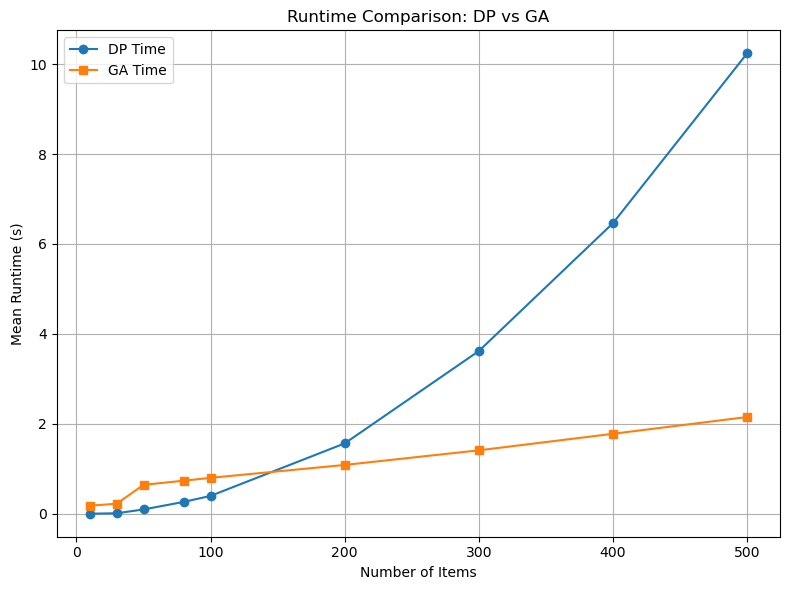

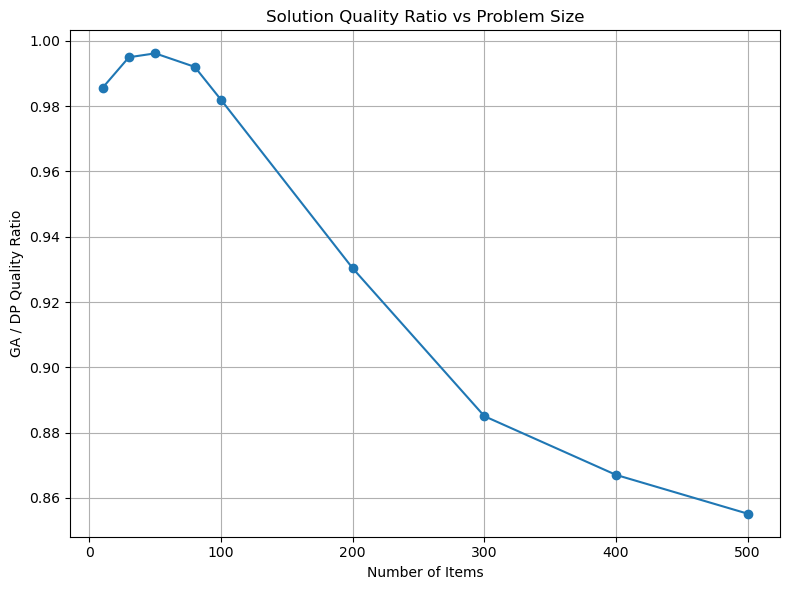

In [17]:
# Plot runtime comparison of DP vs GA vs number of items       
plt.figure(figsize=(8, 6))
plt.plot(df_quality['n_items'], df_quality['dp_time_mean'], marker='o', label='DP Time')
plt.plot(df_quality['n_items'], df_quality['ga_time_mean'], marker='s', label='GA Time')
plt.xlabel('Number of Items')
plt.ylabel('Mean Runtime (s)')
plt.title('Runtime Comparison: DP vs GA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/runtime_comparison.png")
plt.show()
 
# Plot quality ratio vs number of items
plt.figure(figsize=(8, 6))
plt.plot(df_quality['n_items'], df_quality['quality_ratio'], marker='o')
plt.xlabel('Number of Items')
plt.ylabel('GA / DP Quality Ratio')
plt.title('Solution Quality Ratio vs Problem Size')
plt.grid(True)
plt.tight_layout()
plt.savefig("results/solution_quality.png")
plt.show()

#### 4.1.2 Runtime Performance
##### 4.1.2.1 Small to Moderate Sizes $(n=10, 30, 50, 80, 100)$
In our experiments, we observe that **DP** completes extremely fast at the beginning and for $n$ = 10, the running time is almost instant close to ≈ 0.002 s. The time is rising as $n$ increase, but even at $n=100$ it is clos to 0.4 s. This very low runtime for small-to-moderate $n$ is as expected because, **DP’s** complexity is pseudo‐polynomial in the capacity dimension. When $n$ is small and capacity is not enormous, the inner loops remain tiny and **DP** remain fast compare to **GA**.
In contrast, for $n=10$, **GA** is already around 0.2 s. Even though **GA’s** scaling in $n$ is roughly linear **GA’s** fixed costs associated with initializing a population, performing selection, crossover and mutation over 500 generations dominate when $n$ is small. We can say that **GA** spends nearly half of second just cycling through its evolutionary steps, regardless of whether there are 10 or 50 items. As a result, for all $n<100$, **GA** is close to a second, which is much slower than **DP** at small sizes. 
Going forward, by $n=100$, **DP’s** runtime has already increased by about a factor of 4 from $n=50$ to $n=100$, whereas **GA’s** runtime has barely changed. This mean that by approaching $n=100$, the **DP’s** pseudo‐polynomial overhead is start to catch up.
##### 4.1.2.2 Moderate to Large Sizes $(n=200,300,400,500)$
The results of our experiments, shows that doubling the item count from 100 to 200, multiplies **DP’s** time by almost 4, and from 200 to 400 it multiplies again by about 4. This is consistent with **DP’s** $\mathrm{O}(nW)$ or $\mathrm{O}(n^2)$ style growth in practice, since capacity also scales with $n$ in these experiments.  
On the other hand, from $n=100$ to $n=500$, **GA’s** runtime grows very slowly between one and two seconds. We can add this to the fact that each additional item only adds one more “bit” to evaluate for every individual in each generation. In our experiments, the population size and number of generations are fixed and that overhead grows linearly in $n$ but with a very small constant factor.
The two curves cross somewhere between $n=130$ and $n=160$. Below that intersection, **DP** is still faster and above it, we can say that **GA** becomes the quicker method and large scale trend. **DP’s** curve is “bending up” sharply due to the pseudo‐polynomial cost, whereas **GA’s** curve is nearly flat. We can assume that for very large knapsack sizes $n>500$, **DP** can run for multiple seconds or even minutes depending on capacity scaling, while **GA** running time with fixed number of generations each checking $n$ items will be still finishing in a couple of seconds. 

#### 4.1.3 Solution Quality (GA vs Optimal)
We use the **DP** algorithm as standart, because **DP** always finds the true optimum for 0/1 knapsack instances.
We measured **GA** best value using the quality ratio, in which a ratio of 1.00 indicates that **GA** reached the exact optimum; a ratio of 0.95 means **GA** found 95 % of the optimum. 
##### 4.1.3.1 Experiment Results for Very Small Instances (10 to 30 items)
On very small test cases 10 to 30 items, **GA** consistently found the optimum or something nearly and the quality ratio hovers around 1.00. At 10 to 30 items, the ratio is close to 1.00, losing about less than 1 %, of the optimum. The search space is small enough that even with a fixed **GA** parameters - population=100 and generations=200, **GA** almost always is close to global optimum. 
##### 4.1.3.2 Small‐to‐Medium Instances (30 to 100 items)
As the number of items increases, the quality ratio produced by **GA** gradually declines. Once the problem size reaches around 100 items, the solution space becomes too large for the **GA** to thoroughly explore every promising region. Consequently, we observe that **GA** loses roughly 2 % of the optimal value, and the overall downward trend in solution quality becomes apparent.
##### 4.1.3.3 Moderate‐to‐Large Instances (100 to 500 items)
Between 100 and 200 items, **GA** consistently falls short of the optimal solution by about 6 to 8 %, and this downward trajectory persists as $n$ grows. By $n=500$, **GA** is losing roughly 15 % of the optimum. These results indicate that, under our current GA settings, the algorithm no longer explores a sufficient portion of the exponentially expanding solution space. In particular, the steep decline in solution quality from 100 up to 500 items represents the most telling trend in assessing **GA’s** performance.

On small knapsack instances the **GA** is nearly exact, achieving almost 100 % of the optimal value. As the problem size increases from 30 to 100 items, our algorithm with fixed parameters typically finds about 98 % of the optimum. For larger instances (200–500 items), the **GA’s** performance degrades further, missing up to 15 % of the optimal solution. In other words, while a fixed‐parameter **GA** can be tuned to match the **DP** optimum on small problems, it gradually loses solution quality as $n$. 

To fix this we should increase the search effort and increase the number of populations, generations, or involve a different hybrid strategies, hybrid operators or elitism tweaks. 

### 4.3 Parameter Sensitivity Experiments for GA
Previous sensitivity analyses of the GA’s parameters showed that changing population size, mutation rate, and number of generations can affect both runtime and solution quality, highlighting the **GA’s** strong dependence on parameter choices. Taking this into account, we decided to evaluate the **GA’s** performance, over a series of experiments targeting its key parameters - population size, number of parameters and mutation.  

To understand how the hyperparameters affects the **GA** performance, we start we the definition of  `run_ga_sensitivity(n_items=200, repeats=3)`function. Within this function, we will run two solvers `run_dp(w, v, C)` and `run_ga(w, v, C, ga_params)` and benchmark their results at fixed number of items $n=200$. The function accepts `n_items` (default 200) and `repeats` (default 5).
We first set up a default GA configuration dictionary `default_ga_params` and define three separate lists of candidate values (sweeps) to try 
- `population_size': [50, 100, 200, 300, 500, 800]`,
- `mutation_rate: [0.001, 0.01, 0.05, 0.1]`,
- `num_generations: [50, 100, 200, 300, 500, 800]`
Similar to our prevous experiments, we generate a random knapsack instance of 200 items and solve it optimally with **DP** and store the solution as `dp_val`. For each candidate value in the parameter’s lists `population_size`, `mutation_rate`,  `num_generations` we: 
 - copy the default GA settings and overwrite just that one parameter;
 - run the GA solver, record the GA’s best value and runtime;
 - append a row to raw_results containing {`parameter`: param, `value`: val, `dp_value`: dp_val, `ga_value`: val_ga, `ga_time`: t_ga}.
After all repeats and sweeps are done, we convert `raw_results` into a Pandas DataFrame, then group by "parameter", "value" and compute the mean of `dp_value_mean`, `ga_value_mean`, `ga_time_mean`. Then we compute the “quality_ratio” = ga_value_mean / dp_value_mean.

Finally, we display a labeled tuple ('GA_Parameter_Sensitivity', `df_agg`) and return `df_agg`.

In [21]:
def run_ga_sensitivity(n_items=200, repeats=3):
    default_ga_params = {
        'population_size': 100,
        'num_generations': 200,
        'mutation_rate': 0.01,
        'tournament_size': 2,        
    }
    sweeps = {
        'population_size': [50, 100, 200, 300, 500, 800],
        'mutation_rate': [0.001, 0.01, 0.05, 0.1],
        'num_generations': [50, 100, 200, 300, 500, 800]
    }
    raw_results = []
    for _ in range(repeats):
        w, v, C = generate_knapsack_instance(n_items)
        dp_val, _, _ = run_dp(w, v, C)  # one DP run per instance

        for param, values in sweeps.items():
            for val in values:
                ga_params = default_ga_params.copy()
                ga_params[param] = val
                val_ga, _, t_ga = run_ga(w, v, C, ga_params)
                raw_results.append({
                    'parameter': param,
                    'value': val,
                    'dp_value': dp_val,
                    'ga_value': val_ga,
                    'ga_time': t_ga
                })

                df_raw = pd.DataFrame(raw_results)

    # Aggregate means
    df_agg = df_raw.groupby(['parameter','value']).agg(
        dp_value_mean=('dp_value','mean'),
        ga_value_mean=('ga_value','mean'),
        ga_time_mean=('ga_time','mean')
    ).reset_index()
    df_agg['quality_ratio'] = df_agg['ga_value_mean'] / df_agg['dp_value_mean']
    
    df_sense=('GA_Parameter_Sensitivity', df_agg)
    display(df_sense)
    return df_agg

# Run the sensitivity experiment
df_sensitivity = run_ga_sensitivity(n_items=200, repeats=3)

('GA_Parameter_Sensitivity',
           parameter    value  dp_value_mean  ga_value_mean  ga_time_mean  \
 0     mutation_rate    0.001         8192.0    7578.000000      1.060309   
 1     mutation_rate    0.010         8192.0    7678.666667      1.089086   
 2     mutation_rate    0.050         8192.0    6479.666667      1.203795   
 3     mutation_rate    0.100         8192.0    6172.666667      1.327737   
 4   num_generations   50.000         8192.0    7133.666667      0.268497   
 5   num_generations  100.000         8192.0    7446.000000      0.544475   
 6   num_generations  200.000         8192.0    7627.666667      1.098759   
 7   num_generations  300.000         8192.0    7700.000000      1.622953   
 8   num_generations  500.000         8192.0    7712.333333      2.709411   
 9   num_generations  800.000         8192.0    7750.666667      4.354258   
 10  population_size   50.000         8192.0    7463.666667      0.544455   
 11  population_size  100.000         8192.0   

#### 4.3.1 Plotting the results 
To show the results of our experiments a series of plots will be created with the aim to analyze the impact of following GA's key parameters:
  - *Population Size*: Two plots will show the runtime and solution quality of **GA** for different population sizes  while keeping the mutation rate and number of generations constant.
  - *Mutation Rate*: Similarly, two other plots will illustrate the effect of varying the mutation rates on **GA's** runtime and solution quality, with a fixed population size and number of generations.
  - *Number of Generations*: The final, two plots in this series will show how the number of generations influences the runtime and solution quality of **GA**, given constant population size and mutation rate.

In [23]:
def plot_parameter_sensitivity(df_sensitivity):
    """
    Produce a 3×2 grid of plots showing:
      - left column: mean GA runtime vs. parameter value
      - right column: solution‐quality ratio vs. parameter value
    """   
    # 1) Split the DataFrame into three smaller DataFrames, one for each parameter type:
    pop_df  = df_sensitivity[df_sensitivity['parameter'] == 'population_size']
    mut_df  = df_sensitivity[df_sensitivity['parameter'] == 'mutation_rate']
    gens_df = df_sensitivity[df_sensitivity['parameter'] == 'num_generations']

    # 2) For each of those, compute the mean (aggregated) runtime and quality at each parameter value:
    pop_agg = (pop_df.groupby('value').agg({'ga_time_mean': 'mean', 'quality_ratio': 'mean'})
        .reset_index()
        .rename(columns={'value': 'parameter_value', 'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    mut_agg = (mut_df.groupby('value').agg({'ga_time_mean': 'mean','quality_ratio': 'mean'})
        .reset_index().rename(columns={'value': 'parameter_value', 'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    gens_agg = (gens_df.groupby('value').agg({'ga_time_mean': 'mean','quality_ratio': 'mean'
        }).reset_index().rename(columns={'value': 'parameter_value', 'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )
    
    # 3) Create a 3×2 subplot grid:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
    # axes is a 3×2 array of Axes objects: 
    #   axes[0,0] and axes[0,1] for population_size
    #   axes[1,0] and axes[1,1] for mutation_rate
    #   axes[2,0] and axes[2,1] for num_generations

    # --- Population Size (row 0) ---
    # Left: runtime vs. population_size
    axes[0, 0].plot(pop_agg['parameter_value'], pop_agg['mean_runtime'], marker='o', linestyle='-'
    )
    axes[0, 0].set_xlabel('Population Size')
    axes[0, 0].set_ylabel('Mean GA Runtime (s)')
    axes[0, 0].set_title('Effect of Population Size on Runtime')
    axes[0, 0].grid(True, linestyle='--', alpha=0.6)

    # Right: quality_ratio vs. population_size
    axes[0, 1].plot(pop_agg['parameter_value'], pop_agg['mean_quality'], marker='o', linestyle='-')
    axes[0, 1].set_xlabel('Population Size')
    axes[0, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[0, 1].set_title('Effect of Population Size on Solution Quality')
    axes[0, 1].grid(True, linestyle='--', alpha=0.6)
    
    # --- Mutation Rate (row 1) ---
    axes[1, 0].plot(mut_agg['parameter_value'], mut_agg['mean_runtime'], marker='o', linestyle='-')
    axes[1, 0].set_xlabel('Mutation Rate')
    axes[1, 0].set_ylabel('Mean GA Runtime (s)')
    axes[1, 0].set_title('Effect of Mutation Rate on Runtime')
    axes[1, 0].grid(True, linestyle='--', alpha=0.6)

    axes[1, 1].plot(mut_agg['parameter_value'],mut_agg['mean_quality'], marker='o', linestyle='-')
    axes[1, 1].set_xlabel('Mutation Rate')
    axes[1, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[1, 1].set_title('Effect of Mutation Rate on Solution Quality')
    axes[1, 1].grid(True, linestyle='--', alpha=0.6)

    # --- Number of Generations (row 2) ---
    axes[2, 0].plot(gens_agg['parameter_value'],gens_agg['mean_runtime'], marker='o', linestyle='-')
    axes[2, 0].set_xlabel('Number of Generations')
    axes[2, 0].set_ylabel('Mean GA Runtime (s)')
    axes[2, 0].set_title('Effect of Number of Generations on Runtime')
    axes[2, 0].grid(True, linestyle='--', alpha=0.6)

    axes[2, 1].plot(gens_agg['parameter_value'], gens_agg['mean_quality'], marker='o', linestyle='-' )
    axes[2, 1].set_xlabel('Number of Generations')
    axes[2, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[2, 1].set_title('Effect of Number of Generations on Solution Quality')
    axes[2, 1].grid(True, linestyle='--', alpha=0.6)

    # 4) Improve spacing and show and save the figure
    plt.tight_layout()
    plt.savefig('results/parameter_sensitivity.png', dpi=300)
    plt.show()

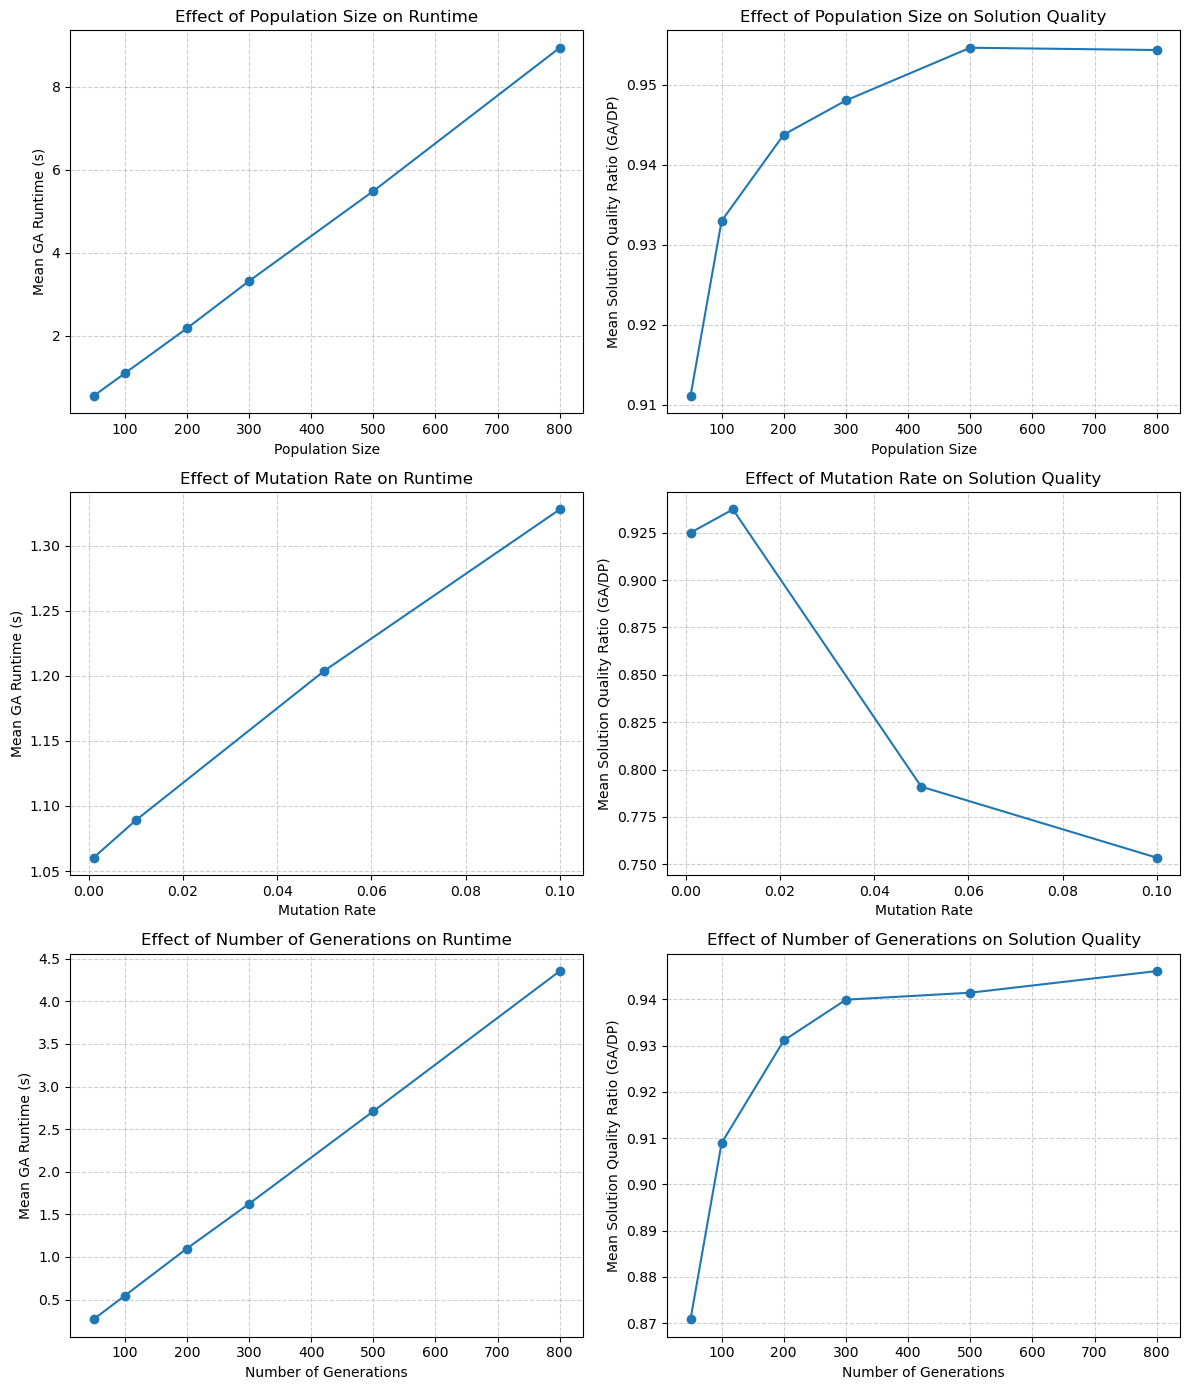

In [24]:
plot_parameter_sensitivity(df_sensitivity)

#### 4.3.2 Parameter Sensitivity Analysis for GA
##### 4.3.2.2 Runtime performance
- *Population Size*
  
Since each generation in **GA**, evaluates every individual’s fitness exactly once we are expecting that increasing the population size generally will lead to longer runtimes, as the **GA** had to evaluate and evolve a larger number of candidate solutions in each generation. In that perspective if we double the population size but keep the number of generations fixed, we should  expect roughly to double the number of fitness evaluations and the runtime will also doubles. The results of our experiments show that going from 50 to 300 individuals multiplies runtime by about 5 and from 300 to 800 almost triples the runtime which is exactly what we expected. Those results are plotted in the first plot series. The relationship between population size and runtime is an almost straight‐line. 
- *Mutation Rate*

In our experiments we see that increasing the mutation rate actually decreases the runtime very slightly. Mutation itself is just a small extra operation per individual, so changing the probability of applying mutation  doesn’t move the runtime needle very far. The results are plotted in the second plot series. 
- *Number of Generarions*

Similar to the population size, runtime almost grows linearly with the number of generations. Increasing the number of generations by twice or even three times roughly doubles or triples the total runtime. Again, we can say that because each generation runs the entire population if we double or triple the number of generations but keep the number of populations sizes fixed, we should  expect roughly to double the number of fitness evaluations and the runtime will also doubles. 
##### 4.3.2.1 Solution quality
- *Populaton Size*

Our experimental results on how population size affects solution quality show a clear upward trend as we increase the number of individuals. Specifically, we observed a steady improvement in the quality ratio up to about 300 to 500 individuals. Beyond that point, performance either plateaued or exhibited slight fluctuations before continued to rise as we rise the population size.
- *Mutation Rate*

We observed that a very low mutation rate (0.001–0.01) is the best choice. Because chromosomes near optimality are disrupted less often, the **GA** moves closer to the **DP** optimum on average. In contrast, a moderate to high mutation rate (0.05–0.10) injects excessive randomness in each generation and as $μ$ increases toward 0.10, solution quality steadily decreases. In other words, a small amount of mutation prevents premature convergence, but once the mutation rate is too high, the **GA** introduces so much randomness that it cannot effectively fine-tune solutions.
- *Number of Generations*

Throughout our experiments, much like with population size, increasing the number of generations consistently improved solution quality. Specifically, solution quality steadily rose up to around 200 to 300 generations. Beyond this range, we observed a slight dip or plateaued in solution quality, after which performance began to improve again as the number of generations continued to grow.

## 5 What is next? Possible improvements 
### 5.1 Hybrid Strategies
In our experiments, we observe that beyond 200 items, our **GA** algorithm with modest settings will generally miss 8 to 15 % of the optimum. Our results confirm that **GA** can approach **DP’s** optimal value, when the problem is small, but as the instance size grows, a fixed parameter **GA**, will gradually lose solution quality.  

One way to overcome this problem is to increase the search effort and increase the number of populations, generations, or involve a different hybrid strategies or operators. Our study on the sensitivy of the GA parameters such as populations size and number of generations, show gradual improvement of the quality ration, by raising the two parameters. We achive an improvement of the solution quality by increasing the population size or number of generations, but still a few percent bellow the optimum.

Taking this into account, we deside to improve our **GA** algorithm with the "seeding" hybrid operator. 
The idea behind “seeding” one chromosome, with a greedy knapsack solution, is to give the **GA** a head start. Instead of starting all 200 individuals completely at random, we force exactly one individual to be the output of a simple, fast greedy heuristic. The remaining 199 individuals are still pure random bit vectors. A standart **GA** might take dozens (or hundreds) of generations just to stumble upon a moderately good knapsack packing—especially if n (number of items) is in the hundreds or thousands. By injecting a greedy solution that already packs “high value per weight,” we aim to ensure that from generation 0 we have at least one individual whose total value is as good (or better) than what a one pass greedy algorithm would produce.

### 5.2 Hybrid GA Algorithm 
To our "standard" **GA** algorithm we add one new function `greddy_init`. The `greddy_init` function is used with the idea to plant one carefully constructed solutions from a domain‐specific heuristic (greedy) into generation 0. The function starts with an all-zero chromosome `ind[i] = 0` for all `i`, meaning “no items chosen.” Then compute the “value per unit weight” ratio for each item - `ratio[i]` and it sort item indices in descending order of the ratio. Iterate through that sorted list and if item `i` weight is $≤$  the remaining capacity, set `ind[i] = 1`(include it), and subtract `weights[i]` from remaining capacity. 
Otherwise skip it and move on. At the end return the resulting 0/1 vector `ind`. 

In [28]:
def solve_knapsack_ga_hy(weights, values, capacity, population_size=100, 
                         num_generations=200, mutation_rate=0.01, tournament_size=2, elitism=True,): 
                         
    
    weights = np.array(weights)
    values  = np.array(values)
    n = len(weights)

    def fitness(ind):
        w = (weights * ind).sum()
        v = (values * ind).sum()
        if w <= capacity:
            return v
        else:
            return 0  

    def greedy_init():
        ind = np.zeros(n, dtype=int)
        remaining = capacity
        for i in np.argsort(-values / weights):
            if weights[i] <= remaining:
                ind[i] = 1
                remaining -= weights[i]
        return ind

    def create_random():
        return np.random.randint(0, 2, size=n)

    def tournament(pop, fits):
        competitors = random.sample(range(len(pop)), tournament_size)  
        best = max(competitors, key=lambda i: fits[i])
        return pop[best].copy()

    def crossover(p1, p2):
        pt = random.randint(1, n-1)
        return np.concatenate([p1[:pt], p2[pt:]]), np.concatenate([p2[:pt], p1[pt:]])       

    def mutate(ind):
        for i in range(n):
            if random.random() < mutation_rate:
                ind[i] ^= 1
        return ind
    
    pop = [greedy_init()] + [create_random() for _ in range(population_size - 1)]
    best_val = -1
    best_ind = None

    for gen in range(num_generations):
        fits = [fitness(ind) for ind in pop]

        # Update global best
        current_best = max(fits)
        if current_best > best_val:
            best_val = current_best
            best_ind = pop[int(np.argmax(fits))].copy()

        new_pop = []
        while len(new_pop) < population_size:
            p1 = tournament(pop, fits)
            p2 = tournament(pop, fits)
            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)
            new_pop.extend([c1, c2])

        pop = new_pop[:population_size]

    return best_val, best_ind

### 5.3 Running the Experiments 
Similar to our set of previous experiments on number of items, we define two solvers `run_dp_hy(weights, values, capacity)`, `run_ga_hy(weights, values, capacity, params)`. 
We define a `benchmark_hybrid` function in which we wrap the solvers and we benchmark them on randomly generated instances of increasing sizes, repeating each five times and recording the following parameters:
- mean running time for DP vs GA;
- mean achieved value for DP vs GA;
- quality ratio - mean GA value/mean DP(optimal) value.

Again, at the end we will have a DataFrame with columns `n_items`, `dp_time_mean`, `ga_time_mean`, `dp_value_mean`, `ga_value_mean`, `quality_ratio`. 

In [30]:
def run_dp_hy(weights, values, capacity):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_dp(weights, values, capacity)
    return value, selected, time.perf_counter() - t0

def run_ga_hy(weights, values, capacity, params):
    t0 = time.perf_counter()
    value, selected, = solve_knapsack_ga_hy(
        weights, values, capacity,
        population_size=params['population_size'],
        num_generations=params['num_generations'],
        mutation_rate=params['mutation_rate'],
        tournament_size=params['tournament_size']
        
    )
    return value, selected, time.perf_counter() - t0

def benchmark_hybrid(ns, repeats=5, ga_params=None):
    if ga_params is None:
        ga_params = {
            'population_size': 100,
            'num_generations': 200,
            'mutation_rate': 0.01,
            'tournament_size': 2,                       
        }
    results = []
    for n in ns:
        dp_times, ga_times = [], []
        dp_vals, ga_vals = [], []
        for _ in range(repeats):
            w, v, C = generate_knapsack_instance(n)
            val_dp, _, t_dp = run_dp(w, v, C)
            val_ga, _, t_ga = run_ga_hy(w, v, C, ga_params)
            dp_times.append(t_dp)
            ga_times.append(t_ga)
            dp_vals.append(val_dp)
            ga_vals.append(val_ga)        
        
        results.append({
            'n_items': n,
            'dp_time_mean': np.mean(dp_times),
            'ga_time_mean': np.mean(ga_times),
            'dp_value_mean': np.mean(dp_vals),
            'ga_value_mean': np.mean(ga_vals),
            'quality_ratio': np.mean(ga_vals) / np.mean(dp_vals)
        })
    return pd.DataFrame(results)
  
if __name__ == "__main__":
    ns = [10, 20, 30, 50, 100, 200, 300, 400, 500]
    ga_params = {
        'population_size': 100,
        'num_generations': 200,
        'mutation_rate': 0.01,
        'tournament_size': 2        
    }
    df_hybrid = benchmark_hybrid(ns, repeats=5, ga_params=ga_params)
    print(df_hybrid)

   n_items  dp_time_mean  ga_time_mean  dp_value_mean  ga_value_mean  \
0       10      0.002765      0.532307          401.8          401.8   
1       20      0.013210      0.547848          849.8          846.4   
2       30      0.038431      0.605037         1259.0         1257.6   
3       50      0.099682      0.654761         1967.6         1965.2   
4      100      0.387757      0.813969         3948.4         3942.0   
5      200      1.553665      1.087096         8128.0         8125.4   
6      300      3.684302      1.433800        12141.6        12138.2   
7      400      6.510809      1.777543        16245.2        16242.0   
8      500     10.044328      2.137191        20788.0        20786.0   

   quality_ratio  
0       1.000000  
1       0.995999  
2       0.998888  
3       0.998780  
4       0.998379  
5       0.999680  
6       0.999720  
7       0.999803  
8       0.999904  


### 5.4 Ploting the Results 
We will present the outcome of our results in the follwoing two plots:
- Runtime Comparison Plot: A line plot showing the number of items on the x-axis and the runtime (in seconds) on the y-axis.
- Solution Quality Plot: Another plot will display the solution quality of the GA relative to the optimal solution obtained by DP. Again on the x-axis we will represent the number of items, and the y-axis we will show the Quality Ratio.

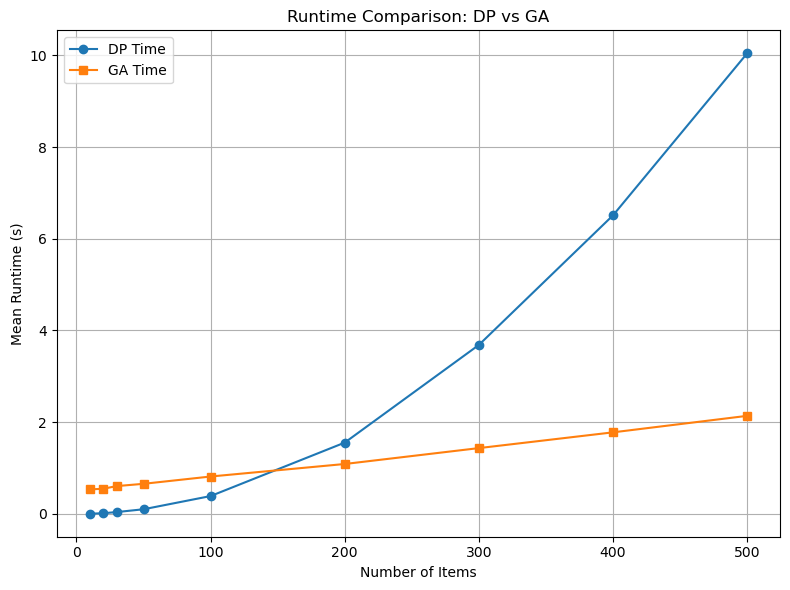

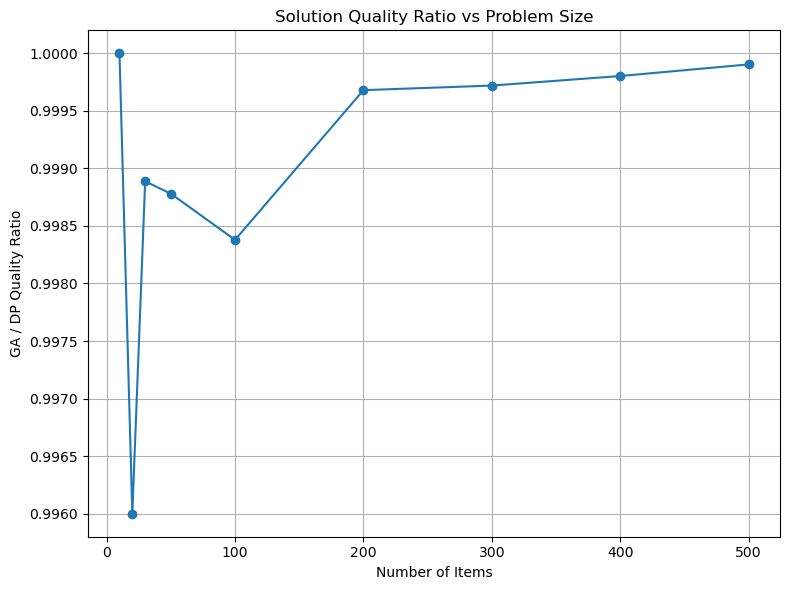

In [32]:
# Plot runtime comparison of DP vs GA vs number of items       
plt.figure(figsize=(8, 6))
plt.plot(df_hybrid['n_items'], df_hybrid['dp_time_mean'], marker='o', label='DP Time')
plt.plot(df_hybrid['n_items'], df_hybrid['ga_time_mean'], marker='s', label='GA Time')
plt.xlabel('Number of Items')
plt.ylabel('Mean Runtime (s)')
plt.title('Runtime Comparison: DP vs GA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/runtime_comparison_hy.png")
plt.show()
 
# Plot quality ratio vs number of items
plt.figure(figsize=(8, 6))
plt.plot(df_hybrid['n_items'], df_hybrid['quality_ratio'], marker='o')
plt.xlabel('Number of Items')
plt.ylabel('GA / DP Quality Ratio')
plt.title('Solution Quality Ratio vs Problem Size')
plt.grid(True)
plt.tight_layout()
plt.savefig("results/solution_quality_hy.png")
plt.show()

### 5.5 Runtime Performance
Similar to our previous experiments, we observe that **DP** completes extremely fast and for $n$ = 10, the running time is almost instantaneous approximately 0.002 s, and for $n=100$ remains under roughly 0.2–0.4 s. This very low runtime for small to moderate $n$ is as expected because, **DP’s** complexity is pseudo‐polynomial in the capacity dimension.

The **GA** runtime is similar to our previous set of experiments and is sligthly above its performance at the beggining. The runtime rises very slightly as we rise $n$ and for all $n≤100$, **GA** runtime is close to a second. 

Again, we see that doubling the item count from 100 to 200 multiplies DP’s runtime by almost 4, and going from 200 to 400 multiplies it by about 4 to 5. In contarst, **GA’s** runtime grows more gradually, reaching close to two seconds at $n=500$. 
 
Once more, the two curves cross somewhere between $n=140$ and $n=160$. Below that intersection, **DP** is still faster and above it, and **GA** becomes the quicker method for large scale trends. 

### 5.6 Solution Quality (GA vs Optimal)
Our experimental results shows that for $n=10$ and $n=20$, the quality ratio consistently achieves a quality ratio of 1 indicating that our hybrid **GA** matches **DP** exctly. From $n=30$ to $n=500$, **GA** matches **DP** to within 0.1 %. In practice, we can say that **GA** is almost exact for these instances. Occasionally, the **GA** ratio dips just below 1 for larger $n$, but this is almost certainly due to sampling variation and rounding noise. These results are a significant improvement over our results obtained in our initial experiments.

## 6 Overall Analysis 

Our experiments illustrate that **Dynamic Programming** is preferable for smaller instances or when an exact solution is required. If the number of items and capacity are small and $n \times W$ is manageable,  which often means $n$ up to a few hundreds and $W$ not too large, or when item weights are small, **DP** will give the optimal answer quickly. On the downside, **DP’s** time and memory requirements increase dramatically for larger inputs. In our experiments we observe that for 500 items with similar weight scaling, the **DP** table became very large with millions of entries, and it is runtime is very slow. 

On the other hand, **Genetic Algorithm** excels on larger instances or when a near-optimal solution is acceptable within a limited time. **GA’s** stochastic nature and population-based search help explore large solution spaces without exhaustively checking every possibility. In our results, we observed that **GA** outpaced **DP** in runtime from 200 items upwards. We can assume that for larger problems with thousands of items or very large capacities, **DP** would be infeasible, whereas a **GA**  might still produce a good solution in reasonable time. For small to modarate items sizes the standart **GA** missed the **DP** optimum by 2%. Whe the gradual incresement of the number of items, the trend is for gradual decending of qualtiy ration and at $n=500$,  GA miss the optimum by close to 15 %. Our parameter-sensitivity experiments showed that simply increasing the number of generations or enlarging the population size improve that gap significantly and the  quality ratio grows up. In our final set of experiments, we achieved near-optimal results by adding one hybrid component - "seeding" to the initial population to our GA settings.

**Trade-offs between accuracy and runtime**

The primary trade-off highlighted by our comparison is optimality versus speed. 
- **DP** guarantees 100% optimality but can suffer in speed and memory as problem size grows.
- A standart **GA** sacrifices the guarantee of optimality it might return a solution that is a few percent bellow of the best but gains a lot in speed and scalability.
- The hybryd **GA** returns almost optimal solutons but wiht slight increasement of time compare to the standart GA.

## 7 Conclusion
In this project, we implemented and compared a **Dynamic Programming (DP)** approach and a **Genetic Algorithm (GA)** for the 0/1 Knapsack Problem. The **DP** method efficiently finds optimal solutions for smaller instances, but its runtime and memory usage grow substantially as the problem size increases, due to its $\mathrm{O}(nW)$ complexity. In contrast, the **GA** produces near-optimal solutions much more quickly for larger item sets, demonstrating better scalability at the cost of some accuracy.
Our experiments show that for up to 100 items and moderate capacity, **DP** is both fast and exact. However, for larger instances (200–500 items), the **GA** delivers high-quality solutions in a fraction of **DP’s** runtime, albeit with an 8–15% gap from the true optimum. We also observed that increasing the population size or the number of generations further improves **GA** performance. By introducing hybrid parameter and fine-tuning the **GA**, we were able to push solution quality closer to 99–100% of the optimum. Overall, these results illustrate a flexible trade-off between runtime and accuracy.

## 8 Acknowledgements and References

[1] https://en.wikipedia.org/wiki/Knapsack_problem

[2] Awasthi, Y., & Sharma, A. (2020). Contrasting of Various Algorithmic Techniques to Solve Knapsack 0-1 Problem. International Journal on Informatics Visualization, 4(1), 16–23. (Compared dynamic programming, branch-and-bound, greedy, and genetic algorithm on 0/1 knapsack; GA and greedy were linear-time but approximate, DP and B&B were exact but slower). 

[3] Hristakeva, M., & Shrestha, D. (2005). Different Approaches to Solve the 0/1 Knapsack Problem. Simpson College, Indianola, IA. 

[4] Ameen Shaheen and Azzam Sleit, “Comparing between different approaches to solve the 0/1 Knapsack problem,” International Journal of Computer Science and Network Security (IJCSNS), vol. 16, no. 7, pp. 1–10, July 2016

[5] Jahanvi Kolte, Dhaval Jha, and Rajan Datt, “Strategies for implementing the Knapsack Problem,” Internal Technical Report, Department of Computer Engineering, Nirma University, Ahmedabad, Gujarat, India, pp. 419–427, June 2017. 

[6] https://www.geeksforgeeks.org/dynamic-programming/ 

[7] https://en.wikipedia.org/wiki/Genetic_algorithm

[8] https://www.datacamp.com/tutorial/genetic-algorithm-python

[9] Hassan, O. M. S. & Saleh, S. A. (2025). Comprehensive Analysis of Recent Studies on Using Genetic Algorithms for Optimizing Solutions to the 0/1 Knapsack Problem. European Journal of Applied Science, Engineering and Technology, 3(2), 74–86.

[10] Oyewola, D., Hakimi, D., Yahaya, A. Y., & Bolarin, G. (2016). Performance of population size on Knapsack problem. New Trends in Mathematical Sciences, 4(4), 253–258. 

[11] https://github.com/quocviethere/GA-Knapsack